Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

In [2]:
#1) Instalem i importem el connector de mySQL
# %pip install mysql-connector-python
import mysql.connector

#2) Importem les taules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    conn = mysql.connector.connect(   # Conectem amb MySQL
       host="localhost",
       user="root",     # El meu usuari de MySQL
       password="12345",  # La meva clau
       database="Sprint4"  # La base de dades a la que volem accedir
   )

    if conn.is_connected():     # En el cas que la connexió funcioni
        db_info = conn.get_server_info()
        print("Connexió exitosa a la base de dades", db_info)
        cursor = conn.cursor()    # Creem un cursor per executar consultes
        cursor.execute("SHOW TABLES;")     # Per obtenir la llista de taules
        taules = cursor.fetchall()     # Aquesta funció ens torna una llista de tuplas
        for taula in taules:     # Creem un bucle per a que recorri totes les taules adalt executades
            nomtaules = taula[0]    # Anomenen nomtaules a cada element de la tupla
            try:
                globals()[f"df_{nomtaules}"] = pd.read_sql_query(f"SELECT * FROM {nomtaules}", conn)
                print(f"S'ha carregat correctament la taula {nomtaules}")
            except Exception as e:
                print(f"Error al carregar {nomtaules}: {e}")

except mysql.connector.Error as err:
    print(f"Error: {err}")

finally:
    if "conn" in locals() and conn.is_connected():     # locals() es un diccionari amb totes les variables locals, conn.is_connected() serveix per comprovar que està obert abans de tancar-lo
        cursor.close()
        conn.close()
        print("Connexió tancada")

# El cursor es un objecte que permet executar comandaments SQL i recuperar dades de la base de dades.
# Si hagués ficat les taules en diccionari hauria de fer per cada una: df_ccstatus = diccionari.get('ccstatus')    O    df_ccstatus = diccionari['ccstatus']

Connexió exitosa a la base de dades 8.0.40
S'ha carregat correctament la taula ccstatus
S'ha carregat correctament la taula companies
S'ha carregat correctament la taula credit_cards
S'ha carregat correctament la taula transactions
S'ha carregat correctament la taula users
Connexió tancada


C:\Users\alexb\AppData\Local\Temp\ipykernel_1424\1201581389.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  globals()[f"df_{nomtaules}"] = pd.read_sql_query(f"SELECT * FROM {nomtaules}", conn)


In [ ]:
#3) Importo la taula Products, que no estava a mySQL (ja que no vaig fer el nivell 3 de l'exercici 4)

df_products = pd.read_csv(r"C:\Users\alexb\Desktop\Gemma\IT Academy\Data Analytics\SQL\Sprint 4\products.csv")

In [ ]:
#4.1) Transformem i netegem les taules: creem una taula intermitja Prod_Trans

df_prod_trans = df_transactions[["id", "Product_ids"]].copy()
df_prod_trans = df_prod_trans.rename(columns={"id": "Transaction id"})
df_prod_trans["Product_ids"] = df_prod_trans["Product_ids"].str.split(",")  # La columna Product_ids passa a tenir una llista dels productes
df_prod_trans = df_prod_trans.explode("Product_ids")

df_prod_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1457 entries, 0 to 586
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Transaction id  1457 non-null   object
 1   Product_ids     1457 non-null   object
dtypes: object(2)
memory usage: 34.1+ KB


In [ ]:
#4.2) Transformem i netegem les taules: a Products passem "price" de object a float

df_products.info()

df_products["price"] = df_products["price"].str.replace('$', '', regex=False)
df_products["price"] = pd.to_numeric(df_products["price"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    int64  
 1   product_name  100 non-null    object 
 2   price         100 non-null    object 
 3   colour        100 non-null    object 
 4   weight        100 non-null    float64
 5   warehouse_id  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
#4.3) Transformem i netegem les taules: creem una columna a transactions amb el nombre de productes adquirits

df_transactions.info()

df_transactions["Number of products"] = df_transactions["Product_ids"].str.count(",")+1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   Card_id      587 non-null    object        
 2   Business_id  587 non-null    object        
 3   Timestamp    587 non-null    datetime64[ns]
 4   Amount       587 non-null    float64       
 5   Declined     587 non-null    int64         
 6   Product_ids  587 non-null    object        
 7   User_id      587 non-null    int64         
 8   lat          587 non-null    float64       
 9   longitude    587 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 46.0+ KB


In [ ]:
#5) Unim algunes taules (merge) per a realitzar gràfics amb dades de diferentes taules

df_trans_users = pd.merge(df_transactions, df_users, left_on= 'User_id' , right_on='id') # Per a l'exercici 4 i 5

### N1 Exercici 1: Una variable numèrica

<function matplotlib.pyplot.show(close=None, block=None)>

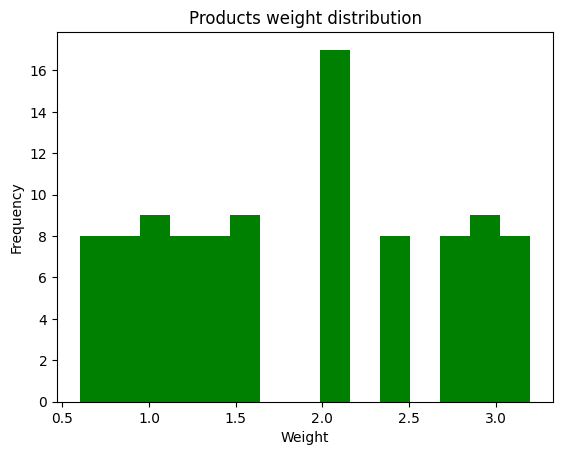

In [15]:
df_products["weight"].plot.hist(bins=15, color='green')

plt.xlabel('Weight')
plt.title('Products weight distribution')
plt.style.use('default')
plt.show

# Amb aquest gràfic el que pretenc es veure el pes que tenen els productes, i si hi ha un major nombre de productes en cert rang de pes.

### N1 Exercici 2: Dues variables numèriques

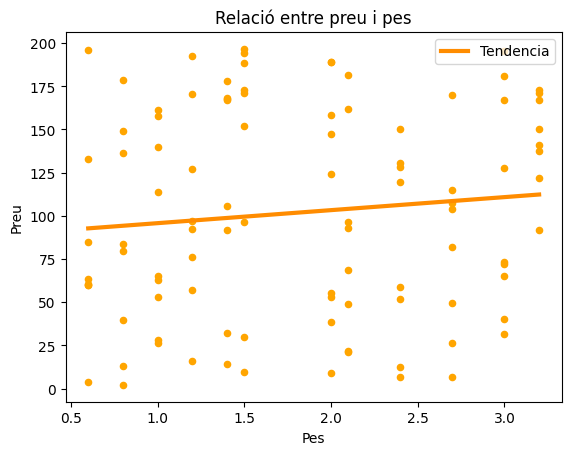

In [16]:
df_products.plot.scatter(x='weight', y='price', c='orange')     # Creo el scatterplot
plt.title('Relació entre preu i pes')
plt.xlabel('Pes')
plt.ylabel('Preu')

coef = np.polyfit(df_products['weight'], df_products['price'], 1) # Calculo la línea de tendencia. Grau 1 para línea recta
line = np.poly1d(coef)

x_vals = np.linspace(df_products['weight'].min(), df_products['weight'].max(), 100)   #Creo valors per la línea en el rang de 'weight'
y_vals = line(x_vals)

plt.plot(x_vals, y_vals, color='darkorange', linewidth=3, label='Tendencia')  # Dibuixo la línea de tendencia

plt.legend()
plt.show()

### N1 Exercici 3: Una variable categòrica

Text(0, 0.5, '')

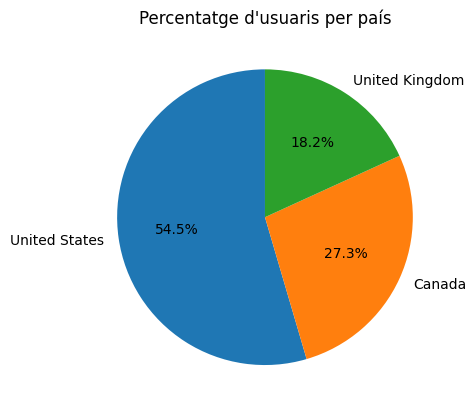

In [3]:
df_users.value_counts('Country').plot.pie(startangle = 90, autopct='%1.1f%%')
plt.title("Percentatge d'usuaris per país")
plt.ylabel('')

# Alternativa:
# nacionalitat = df_users['Country'].value_counts()
# nacionalitat.plot.pie(startangle = 90, autopct='%1.1f%%')

### N1 Exercici 4: Una variable categòrica i una numèrica

[Text(0, 0, '253.559'), Text(0, 0, '245.424'), Text(0, 0, '267.252')]

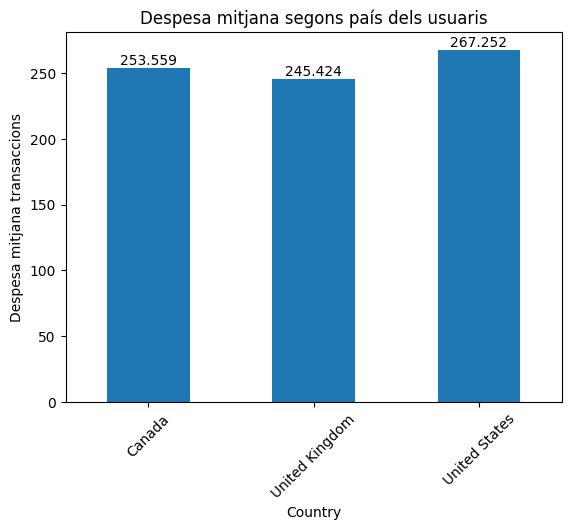

In [82]:
ax=df_trans_users.groupby("Country")["Amount"].mean().plot.bar()
plt.title('Despesa mitjana segons país dels usuaris')
plt.ylabel('Despesa mitjana transaccions')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])

# Faig merge de les taules Transactions i Users per visualitzar la despesa mitjana dels usuaris segons el seu país

### N1 Exercici 5: Dues variables categòriques

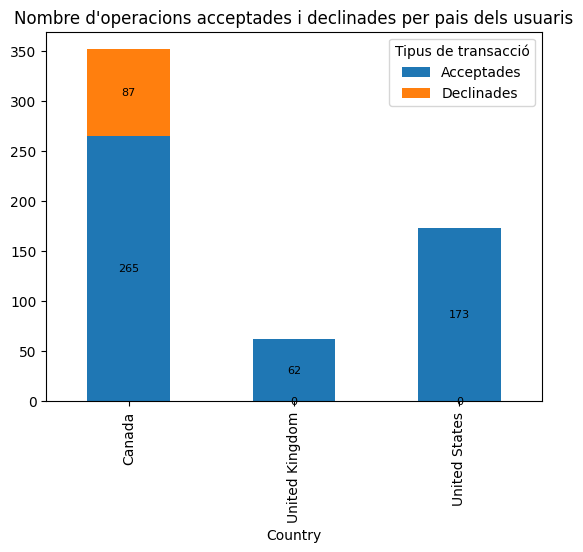

In [53]:
ax=pd.crosstab(df_trans_users["Country"], df_trans_users["Declined"]).plot.bar(stacked=True)
plt.title("Nombre d'operacions acceptades i declinades per pais dels usuaris")
plt.legend(title="Tipus de transacció", labels=["Acceptades", "Declinades"])
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8)
plt.show()

# Faig merge de les taules Transactions i Users per visualitzar els paisos dels usuaris que tenen més operacions declinades, i veig que son tots de Canada

### N1 Exercici 6: Tres variables

Text(0.5, 1.0, 'Relació entre nombre de productes i amount segons el país')

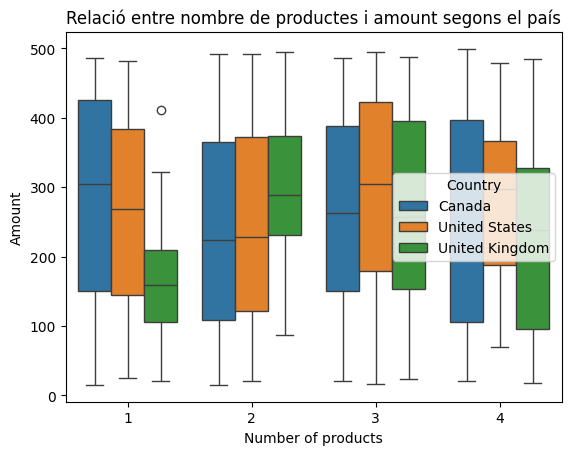

In [40]:
sns.boxplot(data=df_trans_users, x='Number of products', y='Amount', hue='Country')
plt.title('Relació entre nombre de productes i amount segons el país')

### N1 Exercici 7: Graficar un Pairplot

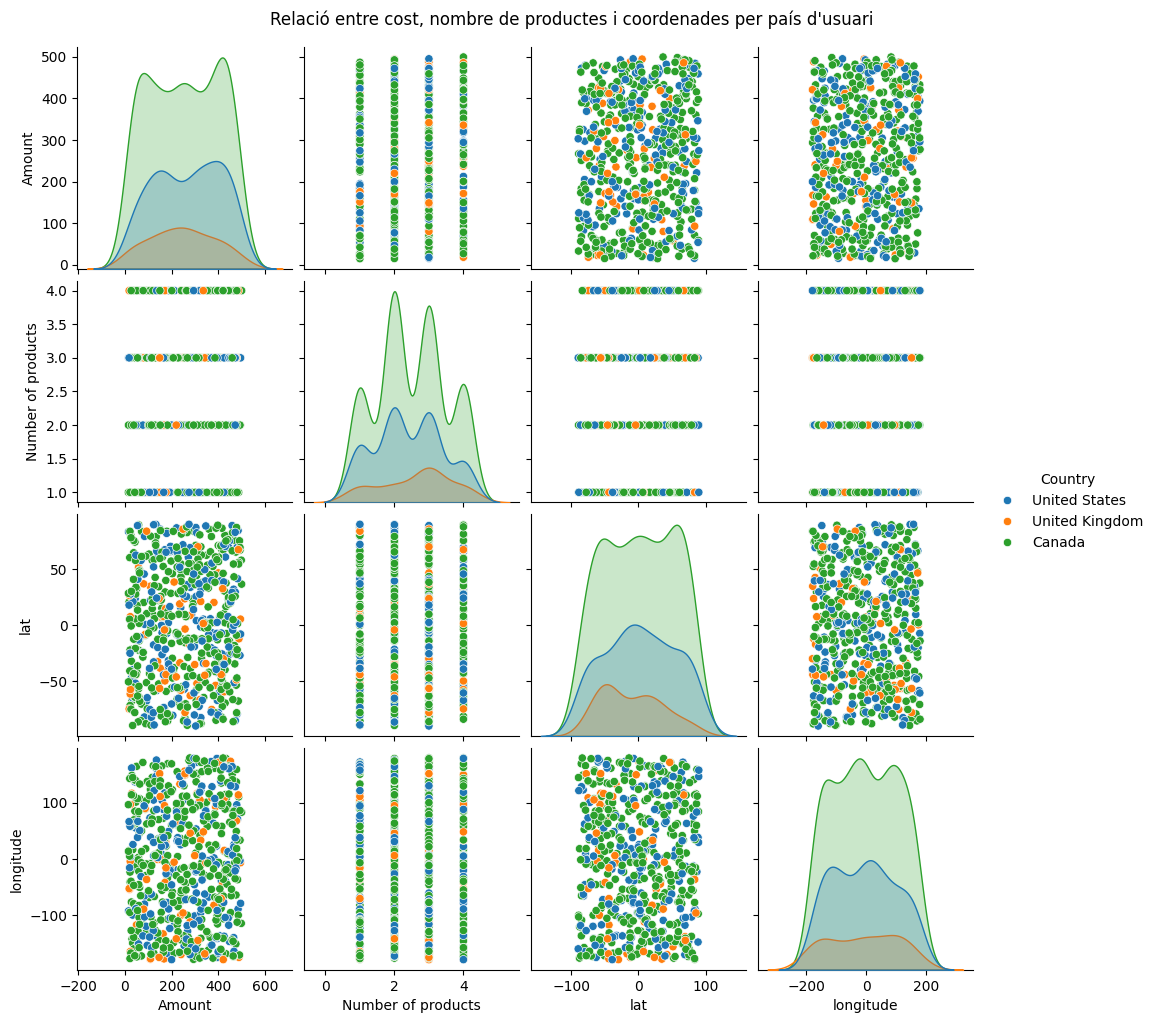

In [76]:
sns.pairplot(data=df_trans_users, vars=['Amount', 'Number of products', 'lat', 'longitude'], hue='Country')
plt.suptitle("Relació entre cost, nombre de productes i coordenades per país d'usuari", y=1.02)
plt.show()

### N2 Exercici 1: Correlació de totes les variables numèriques

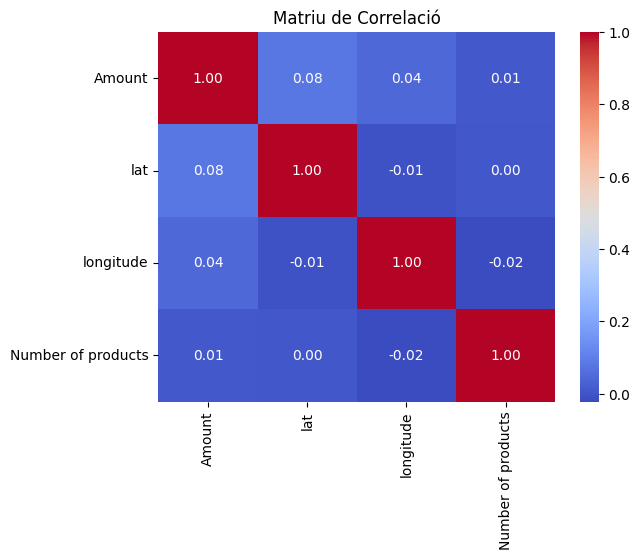

In [ ]:
df_correlacio = df_transactions[['Amount','lat','longitude','Number of products']]
sns.heatmap(df_correlacio.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriu de Correlació')
plt.show()


### N2 Exercici 2: Implementa un jointplot

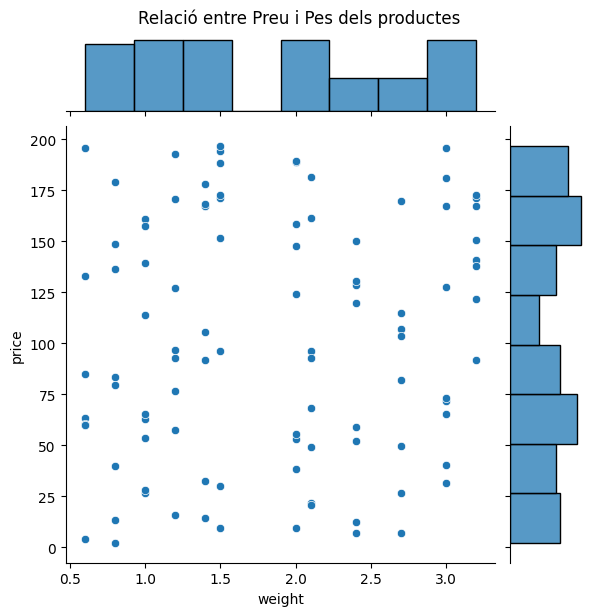

In [71]:
sns.jointplot(data=df_products, x='weight', y='price')
plt.suptitle('Relació entre Preu i Pes dels productes', y=1.02)
plt.show()